# Introduction

This file will show us the ground truth that Ernest Provided in Matlab. Hopefully we can automate it a bit futher than this:

Previously we had mentioned about the ability for us to work with expectation across paths. This is a general case of the approach that Ernest
showed us in the previous meeting. 
Let us begin with:
$$
\begin{align*}
P(\text{error} | \Delta) &= \sum_{\rho\in \mathcal{P}} P(\epsilon , \rho | \Delta)\\
    &=\sum_{\rho\in \mathcal{P}} P(\epsilon | \rho , \Delta)P(\rho | \Delta)\\
    &=\sum_{\rho\in \mathcal{P}} P(\epsilon | \rho , \Delta)P_\Delta(\rho)\\
    &=\mathbb{E}\left[P(\epsilon | \rho , \Delta)\right]\\
\end{align*}
$$

Alas we obtain an expection of error $\epsilon$ over all the possible paths $\rho$. 

Let's expand each term for binary hypothesis testing as follows:
$$
\begin{align}
P(\epsilon | \rho, \Delta) &= P(\epsilon_{I} | \rho, \Delta) + P(\epsilon_{II} | \rho, \Delta)\\
    &= P(\hat{H} = 0 , H^*=1| \rho, \Delta) + P(\hat{H} = 1 , H^*=0| \rho, \Delta)\\
\end{align}
$$

A critical observation to be made here is that $\hat{H}|\rho \perp H^*|\rho$. This is because at the moment that we have observed our path $\rho$ the decision function collapases and becomes completely determined and independent of the hypothesis. 
Furthermore, the probability of selecting a hypothesis is such that $P(\hat{H}=i) \in \{0,1\}$. We thus end up with 
$$
\begin{align}
P(\epsilon|\rho,\Delta) &= P(\hat{H} = 0 | \rho, \Delta) P(H^* = 1 | \rho, \Delta) + P(\hat{H} = 1 | \rho, \Delta) P(H^* = 0 | \rho, \Delta)\\
    &= P(\hat{H} = 0 | \rho, \Delta) P(H^* = 1 | \rho, \Delta) + P(\hat{H} = 1 | \rho, \Delta) P(H^* = 0 | \rho, \Delta)\\
    &= P(\hat{H} = i | \rho, \Delta) P(H^* = j | \rho, \Delta) \\
    &= P(H^* = j | \rho, \Delta) \\
\end{align}
$$
Where only one term will be non-zero, the one where $P(\hat{H}|\rho, \Delta) = 1$
Where $j$ must be such $j\neq i$



WIth Ernest's Derivation we have:

$$
\begin{align*}
P(\epsilon| \rho, \Delta) &= P(H^* = j | \rho, \Delta) =\frac{P(H^*=j, \rho|\Delta)}{P(\rho | \Delta)}\\
    &=\frac{P(\rho|H^*=j,\Delta)P(H^*=j|\Delta)}{P(\rho | \Delta)}\\
    &=\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}
\end{align*}
$$

Notice that the only stochasticity in this system comes from the prior for the hypotheses $\{\mathcal{H}_i\}^N$

**ACTUALLY** I think this is not quite correct. The probability of observing a path $\rho$ changes as the chain evolves.

Then for the numerator

$$
\begin{align*}
P(H^* = j, \rho| \Delta) &= P(\rho | H^* = j, \Delta)\frac{1}{|\mathcal{H}|}\\
    &= P(S_1 = 0, S_0 = 0 | H^* = j , \Delta)\frac{1}{|\mathcal{H}|}\\
    &= P(S_1 = 0| S_0 = 0 , H^* = j , \Delta)P(S_0 = 0 | H^* = j, \Delta)\frac{1}{|\mathcal{H}|}\\
    &= P(S_1 = 0| S_0 = 0 , H^* = j , \Delta)1\frac{1}{|\mathcal{H}|}\\
\end{align*}
$$

Okay so we can go back to the way $\rho$ changes as the chain evolves. For now, we can simplify the denum as :

$$
\begin{align*}
P(\rho|\Delta) &= P(S_1 = 0 , S_0 = 0 | \Delta)\\
    &= \sum_{i\in|\mathcal{H}|} P(S_1 = 0, S_0 = 0 , H_i| \Delta)\\
    &= \sum_{i\in|\mathcal{H}|} P(S_1 = 0, S_0 = 0|H_i,\Delta)P(H_i|\Delta)\\
    &= \sum_{i\in|\mathcal{H}|} P(S_1 = 0| S_0 = 0,H_i,\Delta)P(S_0 = 0|H_i,\Delta)\frac{1}{|H_i|}\\
    &= \sum_{i\in|\mathcal{H}|} P(S_1 = 0| S_0 = 0,H_i,\Delta)1\frac{1}{|H_i|}\\
\end{align*}
$$

Then In that we case for when preference is for $\mathcal{H}_1$.

$$
P(\epsilon | \rho, \Delta) = \frac{P(S_1 = 0| S_0 = 0 , H^* = 2 , \Delta)}{\sum_i P(S_1 = 0| S_0 = 0,H_i,\Delta)}
$$
$$
P(\epsilon | \rho, \Delta) = \frac{P^j_\Delta(S_1 = 0| S_0 = 0)}{\sum P^i_\Delta(S_1 = 0| S_0 = 0)}
$$



Now here is where i am not entirely sure about my derivation. 

Tying it all together we have 

$$
\begin{align}
P(\epsilon| \Delta) &= \mathbb{E}\left[P(\epsilon|p,\Delta)\right]\\
    &= \mathbb{E}\left[\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}\right]
\end{align}
$$

## Lets Generalize this a bit

We want to start with 

$$
\begin{align}
P(\epsilon | \Rho, \Delta) =\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}
\end{align}
$$

then use this for a path $\rho$ of $n$ states. See what is the error probability that we get for this particular path. 
From the fact that decision function collapses to deterministic once a path is observed

We write

# Lets Test This with Code

In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import datetime
import argparse
from sklearn.metrics import roc_curve
from math import factorial
from scipy.linalg import expm
import sp_sims
from sp_sims.simulators.stochasticprocesses import *
from sp_sims.statistics.statistics import *
from sp_sims.estimators.algos import *
from IPython.display import clear_output
from sp_sims.sanitycheck.truebirthdeath import *
#from sp_sims.utils.utils import *
import random
from tqdm import tqdm
from time import sleep
import time

In [3]:
import importlib
importlib.reload(sp_sims.simulators.stochasticprocesses)
importlib.reload(sp_sims.statistics.statistics)

<module 'sp_sims.statistics.statistics' from '/Users/rac716/Research/RL_RateOptimization/sp_sims/statistics/statistics.py'>

In [4]:
%load_ext autoreload
%autoreload 2

# Prepping

In [2]:
# We may change args here:
class Args:
  xres = 100
  length = 3000# Number of transitions in continuous chain 
  state_limit = 1#Inclusive
  init_state = 0
  num_samples =2
  detection_guesses =10000
args = Args()

In [12]:
# Some Util Functions
def take_a_guess(tape, p0, p1):
    num = 0
    denum = 0
    # num = 1
    # denum = 1
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        # num  *= p0[from_state,to_state]
        # denum *= p1[from_state,to_state]
        num += np.log(p0[from_state,to_state])
        denum += np.log(p1[from_state,to_state])

    return 0 if num > denum else 1
def return_ls(tape, p0, p1):
    num = 1
    denum = 1
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        num  *= p0[from_state,to_state]
        denum *= p1[from_state,to_state]
    return num,denum
def stats_for_single_22paths(sts,hts,samp_rate, p0s, p1s, path = [0,0]):
    # Take all Paths 
    # This count how many i->j transitiosn per hypothesis are encountered
    hyp_counts = np.zeros(2) # 2 For 2 number of hypothesis
    # Dice them for sampling rates
    for i,p in enumerate(sts):
        idx_true_hyp = true_values[i]
        sampled_tape = quick_sample(samp_rate, sts[i],hts[i])

        count = ((tmpSampTape[:-1] == path[0]) & (tmpSampTape[1] == path[1])).sum()
        hyp_counts[idx_true_hyp] += count

    return hyp_counts


In [60]:
# Some Setup 
#rates0 = {"lam": 2/10,"mu":4/10}
#rates1 = {"lam": 100/10,"mu":120/10}
np.random.seed(int(time.time()))
rates0 = {"lam": 1,"mu":1.5}
rates1 = {"lam": 0.9,"mu":1.1}
rates = [rates0,rates1]
samp_rates = np.logspace(-3,5,args.xres, base=2)
tgm0 = np.array([[-rates0['lam'],rates0['lam']],[rates0['mu'],-rates0['mu']]])
tgm1 = np.array([[-rates1['lam'],rates1['lam']],[rates1['mu'],-rates1['mu']]])


hts, sts = ([],[])
last_times  = []
true_values = np.random.choice(2,args.detection_guesses)
# Generate The Tapes
for i in range(args.detection_guesses):
    roe = RaceOfExponentials(args.length,rates[true_values[i]],state_limit=args.state_limit)
    holdTimes_tape, state_tape = roe.generate_history(args.init_state)
    hts.append(holdTimes_tape);
    sts.append(state_tape)
    last_times.append(np.cumsum(holdTimes_tape)[-1])


In [11]:
# Preparation of True Probabilities
true_p0s = []
true_p1s = []
fixed_guesses = np.ones((len(samp_rates), args.detection_guesses))
# Crete all the *known* probability functions.
for srIdx, cur_samp_rate in enumerate(samp_rates):
    true_p0s.append(expm(tgm0*(1/cur_samp_rate)))
    true_p1s.append(expm(tgm1*(1/cur_samp_rate)))

# Sampling of Paths

## For a Particular Path $(0\to0)$

In [24]:
# This is all we Need
fixed_state_tape = [0,0]
fixed_true_values= np.random.choice(2,args.detection_guesses)

# Take Our Guesses
guesses = np.zeros((len(samp_rates), args.detection_guesses))
for i in tqdm(np.arange(args.detection_guesses)):
    # Prepare for Decimation: First sample with the quickest rate. -> Smallest Unit of Time Interval
    sampled_tape = fixed_state_tape # Yes, a bit hacky
    # Go Over the 
    for srIdx, cur_samp_rate in enumerate(samp_rates):
        # Fetch Values for Current Rate
        true_p0 = true_p0s[srIdx]
        true_p1 = true_p1s[srIdx]
        true_ps = [true_p0,true_p1]
        
        # How many of the baseline intervals fit into the slow rate interval
        decimateInterval = int(base_samp_rate/cur_samp_rate)
        tmpSampTape = sampled_tape[0::decimateInterval]
        ############################################
        # Limit the NUmebr of Samples
        ############################################
        fixed_guesses[srIdx, i] = take_a_guess(sampled_tape, true_p0, true_p1)
        l0, l1 = return_ls(sampled_tape, true_p0, true_p1) # Shall not use this as it results in very small quantities
        # l0 = return_lr(limited_sampled_tape, true_p0, true_p1)
        # l1 = 1
        ###################################################################
        # Add Per Sample
        #l0Vcs[srIdx, i] = l0
        #l1cs[srIdx, i] = l1

100%|██████████| 100/100 [00:00<00:00, 3529.07it/s]


## For Any Path

## Quick Sample

In [ ]:
########################################
# Generation
########################################
base_samp_rate = samp_rates[-1]
# LIkelihoods in 2D. On First Axis Sampling Rates, On Second Axis number of guesses
# Go Over the Detection Guesses
path_of_interest = [0,0]
print("Sampling at fastest rate : ", base_samp_rate)
#sampled_tapes = (quick_sample(base_samp_rate, sts[0],hts[0]), quick_sample(base_samp_rate, sts[1],hts[1]))
sampled_tapes = []
for i in tqdm(range(len(sts))):
    sampled_tapes.append(quick_sample(base_samp_rate, sts[i],hts[i],max_samples=np.inf))
#sampled_tapes = (simple_sample(base_samp_rate, sts[0],hts[0],max_samples=args.max_samples), simple_sample(base_samp_rate, sts[1],hts[1], max_samples=args.max_samples))
print("Decimating and collecting stats...")

In [61]:
# Do Decimation here.
l0cs = np.zeros((len(samp_rates), args.detection_guesses))
l1cs = np.zeros((len(samp_rates), args.detection_guesses))
guesses = np.zeros((len(samp_rates), args.detection_guesses))
path_hyp_counts = np.zeros((len(samp_rates),2)) # 2 for number of hypothesis
totpath_hyp_counts = np.zeros((len(samp_rates),2)) # 2 for number of hypothesis
shortest_path =  np.inf
for i in tqdm(np.arange(args.detection_guesses)):
    idx_true_hyp = true_values[i]
    # Prepare for Decimation: First sample with the quickest rate. -> Smallest Unit of Time Interval
    # Go Over the 
    for srIdx, cur_samp_rate in enumerate(samp_rates):
        # Fetch Values for Current Rate
        
        # How many of the baseline intervals fit into the slow rate interval
        decimateInterval = int(base_samp_rate/cur_samp_rate)

        displacement = 0
        sampling_point = displacement+ (1/cur_samp_rate)

        # Look For Holding Time
        cumtimes = np.cumsum(hts[i])
        idx_state = np.searchsorted(cumtimes,sampling_point)
        count = sts[i][idx_state] == path_of_interest[1]
        
        #shortest_path = np.min([len(tmpSampTape), shortest_path])

        path_hyp_counts[srIdx,idx_true_hyp] += count

# Some Stats 
#print("Shortest Length of path is: ",shortest_path)

100%|██████████| 1000/1000 [00:00<00:00, 1506.81it/s]


## Debugging/Stats

In [146]:
print("The sampled tapes for each 0 and 1 have different shapes")
print(sampled_tapes[0].shape)
print(sampled_tapes[1].shape)

The sampled tapes for each 0 and 1 have different shapes
(213214,)
(1909756,)


In [ ]:
# Let me see both of these
di = int(base_samp_rate/1)
meep0 = sampled_tapes[0][0::di]
meep1 = sampled_tapes[1][0::di]
plt.plot(np.linspace(0,833,833), meep0)
count0 = ((meep0[:-1] == path_of_interest[0]) & (meep0[1:] == path_of_interest[1])).sum()
count1 = ((meep1[:-1] == path_of_interest[0]) & (meep1[1:] == path_of_interest[1])).sum()
print("Hyp0 count is: {} out of {} total transitions".format(count0,832))
print("Hyp1 count is: {} out of {} total transitions".format(count1,832))
plt.show()

This is for parameters :  {'lam': 0.1, 'mu': 0.2}
Printing Frome:  1984


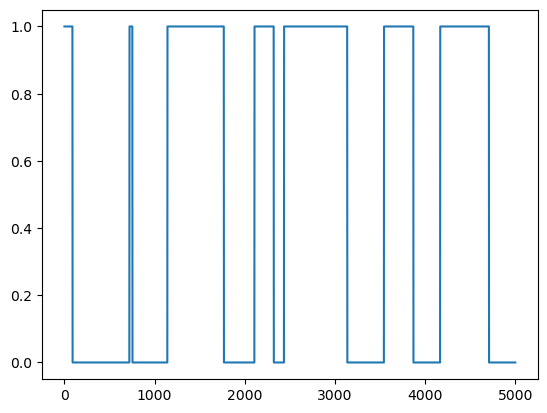

In [120]:
print("This is for parameters : ", rates[true_values[-1]])
window = 5000
init_place = int(np.random.choice(len(tmpSampTape)-window,1))
print("Printing Frome: ", init_place)
rango = tmpSampTape[init_place:init_place+window]
plt.plot(range(len(rango)), rango)
plt.show()

# Data Processing

## Single Path Error Probability

At this point we want to test the single error equation that we derived before:

$$
P(\epsilon| \rho, \Delta) =\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}
$$


In [10]:
# For A single Path
fixed_fprs = []
fixed_fnrs = []

# For each Guess Run, what is the correct hypothesis.
num_tnegs = np.sum(true_values == 0)#TN + FP
num_tpos = np.sum(true_values == 1)#TP + FN

for srIdx, cur_samp_rate in enumerate(samp_rates):
    # Will be fixed for a fixed path
    guesses = fixed_guesses[srIdx]

    hits_index = (true_values == guesses)
    tp = (true_values[hits_index] == 1).sum()
    tn = (true_values[hits_index] == 0).sum()
    
    # Type I and II errors.
    fixed_fprs.append((num_tnegs-tn)/(num_tnegs))
    fixed_fnrs.append((num_tpos-tp)/(num_tpos))# Type 2 Error


In [53]:
# Lets start graphing:
print(fixed_fprs)
print(fixed_fnrs)

NameError: name 'fixed_fprs' is not defined

100%|██████████| 100/100 [00:00<00:00, 629775.38it/s]


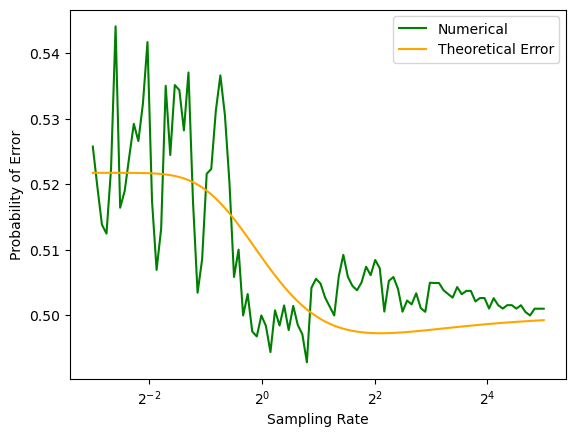

In [65]:
# Graphy Graph

#P(error | path, \Deleta)
tperror = np.zeros(len(samp_rates))
bloop = []
numerical_errors = []
# For Now we will focus on Type I error  because H1 should always be preferred. 
for i in tqdm(np.arange(len(samp_rates))):
    sr = samp_rates[i]
    num = true_p1s[i][0,0] if true_p0s[i][0,0] > true_p1s[i][0,0] else true_p0s[i][0,0]
    num = true_p0s[i][0,0] 
    denum = true_p0s[i][0,0] + true_p1s[i][0,0]
    tperror[i] = num/denum


# Get the Numerical Erros
numerical_errors = (path_hyp_counts[:,0]) / (path_hyp_counts).sum(axis=1)

plt.plot(samp_rates, numerical_errors,color='green', label='Numerical')
plt.plot(samp_rates, tperror, color='orange', label='Theoretical Error')
plt.xscale('log',base=2)
plt.ylabel('Probability of Error')
plt.xlabel('Sampling Rate')
plt.legend()
plt.show()

# > 2 Step Paths:

This is for us to compute

$$
P(\epsilon| \Delta) 
    = \mathbb{E}\left[\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}\right]
$$

In [67]:
# We may change args here:
class Args:
  xres = 100
  length = 1000# Number of transitions in continuous chain 
  state_limit = 1#Inclusive
  init_state = 0
  num_samples =5
  detection_guesses =1000
args = Args()

In [50]:

def prob_of_path(path,  p0,p1):
    # Take two possible hypothesis
    num = 1
    denum = 1
    for i in range(len(path)-1):
        from_state = path[i]
        to_state = path[i+1]
        num  *= p0[from_state,to_state]
        denum *= p1[from_state,to_state]
    # Return the least preferred one
    return num if denum > num else denum

In [80]:
# We want to calculate the average error probability for all paths
# We shouldn't be needing paths
from itertools import product
#num_steps = args.length
#num_states = args.state_limit+1
num_steps = args.num_samples
num_states = 2

states = np.arange(num_states)
samp_rates = np.logspace(-3,5,args.xres, base=2)
rates0 = {"lam": 4/10,"mu":12/10}
rates1 = {"lam": 100/10,"mu":122/10}

rates = [rates0,rates1]

tgm0 = np.array([[-rates0['lam'],rates0['lam']],[rates0['mu'],-rates0['mu']]])
tgm1 = np.array([[-rates1['lam'],rates1['lam']],[rates1['mu'],-rates1['mu']]])

hts, sts = ([],[])
last_times  = []
true_values = np.random.choice(2,args.detection_guesses)
# Generate The Tapes
for i in range(args.detection_guesses):
    roe = RaceOfExponentials(args.length,rates[true_values[i]],state_limit=args.state_limit)
    holdTimes_tape, state_tape = roe.generate_history(args.init_state)
    hts.append(holdTimes_tape);
    sts.append(state_tape)
    last_times.append(np.cumsum(holdTimes_tape)[-1])

# Preparation of True Probabilities
true_p0s = []
true_p1s = []
fixed_guesses = np.ones((len(samp_rates), args.detection_guesses))
# Crete all the *known* probability functions.
for srIdx, cur_samp_rate in enumerate(samp_rates):
    true_p0s.append(expm(tgm0*(1/cur_samp_rate)))
    true_p1s.append(expm(tgm1*(1/cur_samp_rate)))

# Generate
# TODO decrease memory consumption by only using iterators
paths = np.array(list(product(states, repeat=num_steps-1)))
paths = np.concatenate([np.repeat([[0]],repeats=paths.shape[0], axis=0), paths], axis=1)
probs = []

# Sum them up and that should be your probability 
for srIdx, cur_samp_rate in enumerate(samp_rates):
    probs.append(np.sum(np.apply_along_axis(prob_of_path, 1, paths, true_p0s[srIdx],true_p1s[srIdx])))

In [81]:
# Redo the testing experiments

true_values = np.random.choice(2,args.detection_guesses)
hts, sts = ([],[])
last_times  = []

base_samp_rate = samp_rates[-1]

for i in range(args.detection_guesses):
    roe = RaceOfExponentials(args.length,rates[true_values[i]],state_limit=args.state_limit)
    holdTimes_tape, state_tape = roe.generate_history(args.init_state)
    hts.append(holdTimes_tape); sts.append(state_tape)
    last_times.append(np.cumsum(holdTimes_tape)[-1])

# Go Over the Detection Guesses
guesses = np.zeros((len(samp_rates), args.detection_guesses))
min_length = np.inf
for i in tqdm(np.arange(args.detection_guesses)):
    
    # Prepare for Decimation: First sample with the quickest rate. -> Smallest Unit of Time Interval
    sampled_tape = quick_sample(base_samp_rate, sts[i],hts[i])
    # Go Over the 
    for srIdx, cur_samp_rate in enumerate(samp_rates):
        # Fetch Values for Current Rate
        true_p0 = true_p0s[srIdx]
        true_p1 = true_p1s[srIdx]
        true_ps = [true_p0,true_p1]
        
        #LG: How many of the baseline intervals fit into the slow rate interval
        decimateInterval = int(base_samp_rate/cur_samp_rate)
        tmpSampTape = sampled_tape[0::decimateInterval]
        ############################################
        # Option 2 with limited number of samples ##
        ############################################
        limited_sampled_tape = tmpSampTape[0:args.num_samples]
        min_length = np.min([len(limited_sampled_tape), min_length])
        guesses[srIdx, i] = take_a_guess(limited_sampled_tape, true_p0, true_p1)

num_negs = np.sum(true_values == 0)#TN + FP
num_pos = np.sum(true_values == 1)#TP + FN
print("Min Length reached is ", min_length)

fprs,fnrs = ([],[])
hit_rates = []

for srIdx, cur_samp_rate in enumerate(samp_rates):
    guess = guesses[srIdx]
    hits_index = (true_values == guess)
    tp = (true_values[hits_index] == 1).sum()
    tn = (true_values[hits_index] == 0).sum()
    # False Positive and Negative Rates
    fprs.append((num_negs-tn)/(num_negs))
    fnrs.append((num_pos-tp)/(num_pos))# Type 2 Error
    num_hits = (true_values == guess).sum()
    hit_rates.append(num_hits/args.detection_guesses)
fprs = np.array(fprs)
fnrs = np.array(fnrs)
tot_error = fprs+ fnrs

100%|██████████| 1000/1000 [01:01<00:00, 16.33it/s]

Min Length reached is  5.0


This show that the summation of both errors is closer to monotonicity than having peaks.


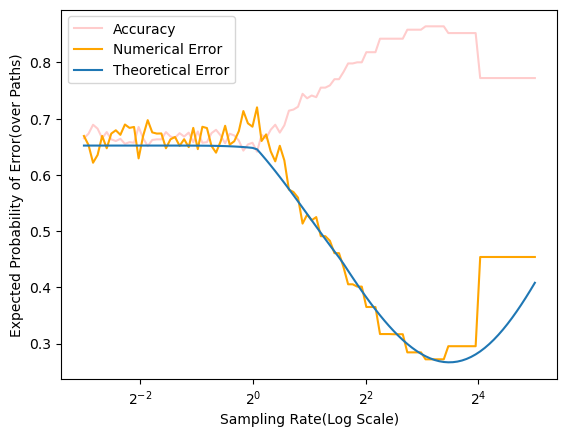

In [85]:
#meep = np.apply_along_axis(prob_of_path, 1, paths, true_p0s[srIdx],true_p1s[srIdx])
#print(len(meep))
#print(meep)
plt.plot(samp_rates, hit_rates, color='red', label='Accuracy', alpha=0.2)
#plt.plot(samp_rates, fprs, color='green', label='Type 1 Error', alpha=0.2)
#plt.plot(samp_rates, fnrs, color='purple', label='Type 2 Error', alpha=0.2)
plt.plot(samp_rates, tot_error, color='orange', label='Numerical Error')
plt.plot(samp_rates, probs, label='Theoretical Error')
plt.xscale('log', base=2)
plt.legend()
plt.xlabel('Sampling Rate(Log Scale)')
plt.ylabel('Expected Probability of Error(over Paths)')
print('This show that the summation of both errors is closer to monotonicity than having peaks.')
plt.show()

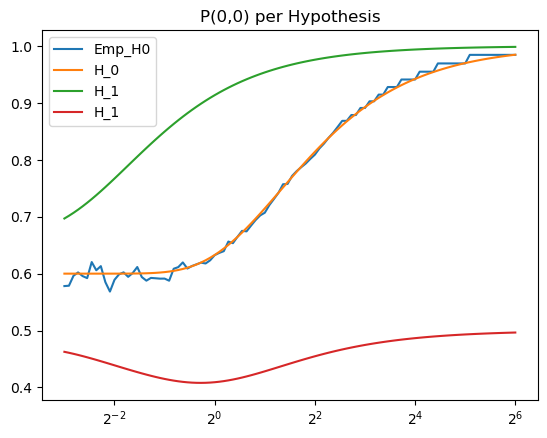

In [13]:
# Just Checking the Probability Per Hypothesis. 
# See If Probabilities Change:
p00_0s = np.array([p[0,0] for p in true_p0s])
p00_1s = np.array([p[0,0] for p in true_p1s])

# Numerical(Excellent this agrees)
plt.plot(samp_rates, path_hyp_counts[:,0]/totpath_hyp_counts[:,0], label="Emp_H0")

# Theoretical 
plt.plot(samp_rates, p00_0s, label="H_0")
plt.plot(samp_rates, p00_1s, label="H_1")
plt.plot(samp_rates, p00_0s/(p00_0s+p00_1s), label="H_1")
plt.legend()
plt.title("P(0,0) per Hypothesis")
plt.xscale('log',base=2)
plt.show()
# Clearym in our particular case H1 is superior than Hypothesis 0 for every single sampling rate. 

In [ ]:
for i,j in enumerate(samp_rates):
    clear_output(wait=True)
    print(fixed_fprs[i])
    print(fixed_guesses[i])
    print(true_p0s[i])
    print(true_p1s[i])
    sleep(0.1)

# Policy Gradient Algorithms

This Section Focuses on Implementing Continous Policies.

There is nothing episodic about our run and environment. We may think of our environment as a simple contextual bandit environment in the sense that there is only a single step. 
However, optimal policies may still be drived. 

Because there is a temporal element to ours sequences we might be inclide to use RNNs to encode them into a hidden vector from
which we can infer the optimal action. 

An extra bit of caveat that we must mention is that we work with actions in continuous space. In these cases I have read that it Bayesian Networks are used. More specficically 
we could draw actions from teh gaussian distribution. In this caswe would learn an appropriate mean and standard deviation. 

In [86]:
import torch
import numpy as np
from torch import nn
import sp_sims
from sp_sims.simulators.stochasticprocesses import *
from sp_sims.statistics.statistics import *
import torch.optim as optim

from scipy.linalg import expm

import importlib
importlib.reload(sp_sims.simulators.stochasticprocesses)
importlib.reload(sp_sims.statistics.statistics)

<module 'sp_sims.statistics.statistics' from '/Users/rac716/Research/RL_RateOptimization/sp_sims/statistics/statistics.py'>

## Define the Model

In [134]:
from collections import deque, namedtuple
import torch.nn.functional as F
import random
class RNNContinuousPolicy(nn.Module):
    def __init__(self, num_states,hidden_size):
        super(RNNContinuousPolicy,self).__init__()
        self.state_limit = num_states
        self.rnn = nn.LSTM(num_states,hidden_size,1,batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X):
        # Prpping
        _,(hiddn,_) = self.rnn(X)
        logit = self.fc(hiddn.squeeze(0))
        output = torch.sigmoid(logit)
        output_normalized = output*64
        return output_normalized
        # We are giving X as a 

# Critic Network
class Critic(nn.Module):
    def __init__(self, state_size, action_size, hidden_size):
        super(Critic, self).__init__()
        # State is One Hot Encoded
        self.rnn = nn.LSTM(state_size, hidden_size, 1, batch_first=True)
        self.fc1 = nn.Linear(hidden_size + 1, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, mstates, action):
        _,(h,_)  = self.rnn(mstates)
        x = torch.cat((h.squeeze(), action), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Replay buffer

class ReplayBuffer:
    def __init__(self, buffer_size, batch_size, chain_length, num_states):
        self.chain_length = chain_length
        self.num_states = num_states
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "samp_rate", "errors" ])

    def add(self, state, samp_rate, errors):
        e = self.experience(state, samp_rate, errors)
        self.memory.append(e)

    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states =  torch.empty((self.batch_size,self.chain_length,self.num_states))
        for i,e in enumerate(experiences):
            hawt_states = torch.nn.functional.one_hot(torch.tensor(e.state.states),num_classes=self.num_states).to(torch.float32)# Transpose it
            hawt_states *= torch.tensor(e.state.holding_times).view(-1,1)
            states[i,:,:] = hawt_states
        actions = torch.from_numpy(np.vstack([e.samp_rate for e in experiences if e is not None])).float()
        errors = torch.from_numpy(np.vstack([e.errors for e in experiences if e is not None])).float()

        return states, actions, errors

    def __len__(self):
        return len(self.memory)

## Setup

In [95]:
# Create the Datasets
# We may change args here:
class Args2:
  xres = 100
  length = 1000# Number of transitions in continuous chain 
  state_limit = 1#Inclusive # DO NOT CHANGE, Architecture can't take it yet
  init_state = 0
  num_samples =5
  batch_size =32
  poptimizer_lr = 1e-4
  coptimizer_lr = 1e-4
  clipping_limit = 64 # Sampling rate no Bigger than this. 
  detection_guesses =10000
  num_epochs = 100
  num_replay_samples = 1 # How many batches do we sample at a time to learn 
# Data Class
class MetaState:
  states: list
  holding_times: list
  def __init__(self,states, holding_times):
    self.states = states
    self.holding_times = holding_times

args2 = Args2()

In [96]:
# Function For Generating a Batch
def get_batch(num_sequences, length, num_states, tvals):
    # maybe for slower chains we will want to 
    num_states = qmatrix.shape[0]

    # Null Hyp
    rates0 = np.random.chisquare(df=2, size =(num_sequences,2))
    rates0[:,1] = np.sum(rates,dim=1) # So that mu > lam

    # Alter Hyp
    rates1 = np.random.chisquare(df=2, size =(num_sequences,2))
    rates1[:,1] = np.sum(rates,dim=1) # So that mu > lam

    rates = [rates0,rates1]
    rates = torch.from_numpy(rates)
    batch =  torch.array((num_sequences,length,num_states))

    for i in range(args2.detection_guesses):
        # Generate State and Holding Times
        roe = RaceOfExponentials(args2.length,rates[tvals[i]],state_limit=args2.state_limit)
        holdTimes_tape, state_tape = roe.generate_history(args2.init_state)
        #hts.append(holdTimes_tape);
        #sts.append(state_tape)

        # Generate
        hawt_states = torch.nn.functional.one_hot(state_tape).T# Transpose it
        hawt_states *= torch.tensor(holdTimes_tape)
        batch[i,:,:] = hawt_states


    return  batch, rates


def get_errors(sampled_tapes, probs, true_hyps):
    # Clean it up 
    p0, p1 = probs
    # Take our guesses
    guesses = np.array([take_a_guess(tape, p0[i],p1[i]) for i,tape in enumerate(sampled_tapes)])
    errors = -1*np.array(true_hyps != guesses)
    return errors


def take_a_guess(tape, p0,p1):
    num = 0
    denum = 0
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        num += np.log(p0[from_state,to_state])
        denum += np.log(p1[from_state,to_state])
    return 0 if num > denum else 1

## Bootstrap the Replay Buffer

In [135]:
# Replay buffer stores (s,a,r,s',d)
# Meaning the Hidden State we se the action we took and the corresponding reward
def populate_replay_buffer(rbuffer,num_to_add):
    
    ## Start By Generating States
    # TODO: Maybe Try Uniform
    # Null Hyp
    #rates0 = np.random.chisquare(df=2, size =(num_to_add,2))
    #rates0[:,1] = np.sum(rates0,axis=1) # So that mu > lam
    # Alter Hyp
    #rates1 = np.random.chisquare(df=2, size =(num_to_add,2))
    #rates1[:,1] = np.sum(rates1,axis=1) # So that mu > lam


    rates = [rates0,rates1]
    true_hyps = np.random.choice(2,num_to_add)

    # Get Fully Labeled Data (Observe State)
    sts, hts = ([],[])
    for i in range(num_to_add):
        roe = RaceOfExponentials(args2.length,rates[true_hyps[i]][i],state_limit=args2.state_limit)
        holdTimes_tape, state_tape = roe.generate_history(args2.init_state)
        sts.append(state_tape)
        hts.append(holdTimes_tape)

    # Get the Batch
    #batch, rates = get_batch(num_to_add, length, args.state_limit, true_hyps)
    
    # Build The Probabilities
    p0s,p1s = np.ndarray((num_to_add, 2, 2)), np.ndarray((num_to_add,2,2))
    for i in range(len(rates[0])):
        rate0, rate1 = (rates[0][i,:],rates[1][i,:])
        p0s[i,:,:] = expm(np.array([[-rate0[0],rate0[0]],[rate0[1],-rate0[1]]]))# 0=lam, 1=mu
        p1s[i,:,:] = expm(np.array([[-rate1[0],rate1[0]],[rate1[1],-rate1[1]]]))

    ## Action Selection
    # Beta Policy: Just Randomly Pick Sampling Rates from some interval(prolly uniformly)
    smp_rates = np.random.uniform(0,4, num_to_add) 
    
    # Action Performance(Sampling At Rate)
    samples = [ quick_sample(rate,sts[i],hts[i],2) for i,rate in enumerate(smp_rates)]

    # Get the corresponding Losses
    errors = get_errors(samples, probs = (p0s,p1s), true_hyps=true_hyps)

    for i,st in enumerate(sts):
        rbuffer.add(MetaState(sts[i],hts[i]), smp_rates[i],errors[i])


In [ ]:
# Test The Populate replay buffer:
mybuffer = ReplayBuffer(1024,32,args2.length, args2.state_limit+1)
populate_replay_buffer(mybuffer, args2.batch_size)
state, actions, rewards = mybuffer.sample()
plt.plot(actions, np.sum(rewards,axis=1))

In [19]:
# Start Working on the Model
from tqdm import tqdm
policy = RNNContinuousPolicy(args2.state_limit+1,hidden_size=16)
critic = Critic(args2.state_limit+1, 1, 16)
poptimizer = optim.Adam(policy.parameters(), lr = args2.poptimizer_lr)
coptimizer = optim.Adam(critic.parameters(), lr = args2.coptimizer_lr)

rbuffer = ReplayBuffer(1024,args2.batch_size, args2.length,args2.state_limit+1)
populate_replay_buffer(rbuffer,args2.batch_size)
# We have Enough Data to Start Sampling and Exploring With 
epochs = tqdm(range(args2.num_epochs))
for e in epochs:
    poptimizer.zero_grad()
    coptimizer.zero_grad()
    ########################################
    # Collect Data
    ########################################
    # This loop will generate paths with the existing policy 
    # Sample Transitions used for learnign
    states, actions, rewards = rbuffer.sample()

    # Get Tartes
    y = rewards

    # Since We We are Doing Accuracy We have to create 
    ########################################
    # Update Networks
    ########################################
    # Calculate the Losses
    loss_Q = (1/args2.batch_size)*torch.sum(torch.pow(critic(states, actions) - y,2))
    loss_P = -(1/args2.batch_size)*torch.sum(critic(states, policy(states)))

    epochs.set_description('Total Rewards {}, Loss_Q {} and loss_P {}'.format(rewards.sum(), loss_Q.item(), loss_P.item()))
    # Learn 
    loss_Q.backward()
    loss_P.backward()
    poptimizer.step()
    coptimizer.step()



    ## Prep for Next Iteration
    # Keep On Adding More Stuff to buffer to learn from 
    populate_replay_buffer(rbuffer, args2.batch_size)
# Training Stats

  0%|          | 0/100 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x5 and 3x16)

In [102]:
policy(states)

tensor([[27.3231],
        [26.9755],
        [27.2020],
        [27.2585],
        [26.1748],
        [27.3572],
        [27.3648],
        [25.0081],
        [27.3284],
        [27.3098],
        [27.0110],
        [27.3416],
        [27.2602],
        [25.3946],
        [27.2414],
        [27.1068],
        [27.2765],
        [27.0896],
        [26.4497],
        [25.4188],
        [26.9865],
        [26.2113],
        [27.2970],
        [27.3212],
        [27.3247],
        [27.2867],
        [27.3202],
        [24.3213],
        [27.0557],
        [26.5796],
        [25.1878],
        [27.1605]], grad_fn=<MulBackward0>)

In [ ]:
# Runtthe Model 
states, a, rewards = rbuffer.sample()
rates = policy(states)
print("Rates Selected are :",rates)

#P(error | path, \Deleta)
tperror = np.zeros(len(samp_rates))
bloop = []
numerical_errors = []
# For Now we will focus on Type I error  because H1 should always be preferred. 
for i in tqdm(np.arange(len(samp_rates))):
    sr = samp_rates[i]
    #num = true_p1s[i][0,0] if true_p0s[i][0,0] > true_p1s[i][0,0] else true_p0s[i][0,0]
    num = true_p0s[i][0,0] 
    denum = true_p0s[i][0,0] + true_p1s[i][0,0]
    tperror[i] = num/denum


# Get the Numerical Erros
plt.plot(samp_rates, numerical_errors,color='green')
plt.plot(samp_rates, tperror, color='orange')
plt.xscale('log',base=2)
#plt.ylim((0,1))
plt.show()



# Different Schema

Issue is the things that we were feeding to our previous model. We should feeed only the hypothesis(parameters) 
and then then we can generate a lot of paths from it and see how it does with the sampling rate it choses

In [1]:
import torch
import numpy as np
from torch import nn
import sp_sims
from sp_sims.simulators.stochasticprocesses import *
from sp_sims.statistics.statistics import *
import torch.optim as optim

from scipy.linalg import expm

import importlib
importlib.reload(sp_sims.simulators.stochasticprocesses)
importlib.reload(sp_sims.statistics.statistics)

<module 'sp_sims.statistics.statistics' from '/Users/rac716/Research/RL_RateOptimization/sp_sims/statistics/statistics.py'>

## Define the Model

In [2]:
from collections import deque, namedtuple
import torch.nn.functional as F
import random
class RNNContinuousPolicy(nn.Module):
    def __init__(self, num_params,hidden_size):
        super(RNNContinuousPolicy,self).__init__()
        #self.state_limit = num_states
        self.fc1 = nn.Linear(num_params, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, X):
        # Prpping
        #_,(hiddn,_) = self.rnn(X)
        logit = self.fc2(F.relu(self.fc1(X)))
        output = torch.sigmoid(logit)
        output_normalized = output*64
        return output_normalized
        # We are giving X as a 

# Critic Network
class Critic(nn.Module):
    def __init__(self, num_param, action_size, hidden_size):
        super(Critic, self).__init__()
        # State is One Hot Encoded
        # State + 1(action)
        self.fc1 = nn.Linear(num_param + action_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, states, action):# States are the paremeters
        #_,(h,_)  = self.rnn(mstates)
        x = torch.cat((states, action), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Replay buffer

class ReplayBuffer:

    def __init__(self, buffer_size, batch_size, chain_length, num_states):
        self.chain_length = chain_length
        self.num_states = num_states
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "samp_rate", "errors" ])

    def add(self, state, samp_rate, errors):
        e = self.experience(state, samp_rate, errors)
        self.memory.append(e)

    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)
        states =  torch.empty((self.batch_size,2**2))# TODO Remove hard code to the number of entries in generator matrix

        # The states will be encoded as tensors
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float()
        actions = torch.from_numpy(np.vstack([e.samp_rate for e in experiences if e is not None])).float()
        errors = torch.from_numpy(np.vstack([e.errors for e in experiences if e is not None])).float()

        return states, actions, errors

    def __len__(self):
        return len(self.memory)

## Setup

In [3]:
# Create the Datasets
# We may change args here:
class Args2:
  xres = 100
  length = 1000# Number of transitions in continuous chain 
  state_limit = 1#Inclusive # DO NOT CHANGE, Architecture can't take it yet
  init_state = 0
  num_samples =5
  batch_size =128
  poptimizer_lr = 1e-3
  coptimizer_lr = 1e-3
  clipping_limit = 64 # Sampling rate no Bigger than this. 
  detection_guesses =10000
  num_epochs = 100
  num_replay_samples = 1 # How many batches do we sample at a time to learn 
# Data Class
class MetaState:
  states: list
  holding_times: list
  def __init__(self,states, holding_times):
    self.states = states
    self.holding_times = holding_times

args2 = Args2()

In [4]:
def get_errors(sampled_tapes, probs, true_hyps):
    # Clean it up 
    p0, p1 = probs
    # Take our guesses
    guesses = np.array([take_a_guess(tape, p0[i],p1[i]) for i,tape in enumerate(sampled_tapes)])
    errors = -1*np.array(true_hyps != guesses)
    return errors


def take_a_guess(tape, p0,p1):
    num = 0
    denum = 0
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        num += np.log(p0[from_state,to_state])
        denum += np.log(p1[from_state,to_state])
    return 0 if num > denum else 1

## Bootstrap the Replay Buffer

In [6]:
# Replay buffer stores (s,a,r,s',d)
# Meaning the Hidden State we se the action we took and the corresponding reward
def populate_replay_buffer(rbuffer,num_of_examples, guesses_per_rate = 64):
    
    ## Start By Generating States
    # TODO: Maybe Try Uniform
    # Null Hyp
    rates0 = np.random.chisquare(df=2, size =(num_of_examples,2))
    rates0[:,1] = np.sum(rates0,axis=1) # So that mu > lam
    # Alter Hyp
    rates1 = np.random.chisquare(df=2, size =(num_of_examples,2))
    rates1[:,1] = np.sum(rates1,axis=1) # So that mu > lam

    rates_features = rates0 + rates1

    rates = [rates0,rates1]

    # Get Errors  # ACTIONS
    smp_rates = np.random.uniform(0,2**6, num_of_examples) # Actions
    errors = [0]*len(smp_rates)# Amount of errors per action

    for i in range(rates0.shape[0]):# For Every State-Action
        true_hyps = np.random.choice(2,guesses_per_rate)
        
        p0 = expm((1/smp_rates[i])*np.array([[-rates0[i,0],rates0[i,0]],[rates0[i,1],-rates0[i,1]]]))# 0=lam, 1=mu
        p1 = expm((1/smp_rates[i])*np.array([[-rates1[i,0],rates1[i,0]],[rates1[i,1],-rates1[i,1]]]))

        for j in range(guesses_per_rate): # Sample a bunch of paths
            roe = RaceOfExponentials(args2.length,rates[true_hyps[j]][i],state_limit=args2.state_limit)
            holdTimes_tape, state_tape = roe.generate_history(args2.init_state)
            # Action Performance(Sampling At Rate)
            tape = quick_sample(smp_rates[i],state_tape,holdTimes_tape,2)

            # Get the corresponding Losses
            errors[i] += take_a_guess(tape, p0,p1)  != true_hyps[j]

    errors = np.array(errors) / guesses_per_rate

    for i in range(num_of_examples):
        rbuffer.add(list(rates0[i])+list(rates1[i]), smp_rates[i],errors[i])


Total Rewards 59.828125, Loss_Q 2.512564182281494 and loss_P 2.3423047065734863:   0%|          | 0/100 [00:46<?, ?it/s] /Users/rac716/miniforge3/envs/rs39/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:315: RuntimeWarning: overflow encountered in cosh
  coshMu = np.cosh(mu)
/Users/rac716/miniforge3/envs/rs39/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:318: RuntimeWarning: overflow encountered in sinh
  sinchMu[mask] = np.sinh(mu[mask]) / mu[mask]
/Users/rac716/miniforge3/envs/rs39/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:320: RuntimeWarning: invalid value encountered in multiply
  eA[..., [0], [0]] = eApD2 * (coshMu + AmD2*sinchMu)
/Users/rac716/miniforge3/envs/rs39/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:321: RuntimeWarning: invalid value encountered in multiply
  eA[..., [0], [1]] = eApD2 * a2 * sinchMu
/Users/rac716/miniforge3/envs/rs39/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:322: RuntimeWarning: invalid value encountered in

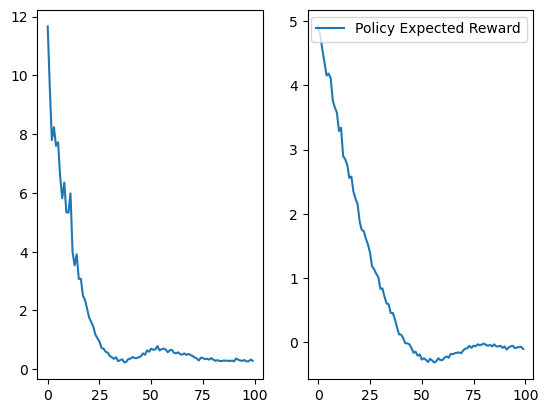

In [8]:
# Start Working on the Model
from tqdm import tqdm
import matplotlib.pyplot as plt 
# TODO remove hard code 
policy = RNNContinuousPolicy(2*2,hidden_size=16)
critic = Critic(2*2, 1, 16)
poptimizer = optim.Adam(policy.parameters(), lr = args2.poptimizer_lr)
coptimizer = optim.Adam(critic.parameters(), lr = args2.coptimizer_lr)

rbuffer = ReplayBuffer(1024,args2.batch_size, args2.length,args2.state_limit+1)
populate_replay_buffer(rbuffer,args2.batch_size)
# We have Enough Data to Start Sampling and Exploring With 
epochs = tqdm(range(args2.num_epochs))
qvalue_loss = []
policyExpectedReward = []
for e in range(args2.num_epochs):
    poptimizer.zero_grad()
    coptimizer.zero_grad()
    ########################################
    # Collect Data
    ########################################
    # This loop will generate paths with the existing policy 
    # Sample Transitions used for learnign
    states, actions, rewards = rbuffer.sample()

    # Get Tartes
    y = rewards

    # Since We We are Doing Accuracy We have to create 
    ########################################
    # Update Networks
    ########################################
    # Calculate the Losses
    loss_Q = (1/args2.batch_size)*torch.sum(torch.pow(critic(states, actions) - y,2))
    loss_P = (1/args2.batch_size)*torch.sum(critic(states, policy(states)))

    # Learn 
    loss_Q.backward()
    loss_P.backward()
    poptimizer.step()
    coptimizer.step()

    # In this one particular case we have a single point that is global max so it would be
    # best to use optimized policy to do some exploration 
    qvalue_loss.append(loss_Q.item())
    policyExpectedReward.append(loss_P.item())

    epochs.set_description('Total Rewards {}, Loss_Q {} and loss_P {}'.format(rewards.sum(), loss_Q.item(), loss_P.item()))


    ## Prep for Next Iteration
    # Keep On Adding More Stuff to buffer to learn from 
    populate_replay_buffer(rbuffer, args2.batch_size)
fig, axs = plt.subplots(1,2)
axs[0].plot(range(len(qvalue_loss)),qvalue_loss,label="Value Estimation Loss")
axs[1].plot(range(len(policyExpectedReward)),policyExpectedReward,label="Policy Expected Reward")
plt.legend()
plt.show()

In [18]:
inputo = torch.tensor([[4/10,12/10,100/10,122/10]])
policy(inputo)

tensor([[28.2941]], grad_fn=<MulBackward0>)

In [7]:
# Runtthe Model 
states, a, rewards = rbuffer.sample()
rates = policy(states)
print("Rates Selected are :",rates)

#P(error | path, \Deleta)
tperror = np.zeros(len(samp_rates))
bloop = []
numerical_errors = []
# For Now we will focus on Type I error  because H1 should always be preferred. 
for i in tqdm(np.arange(len(samp_rates))):
    sr = samp_rates[i]
    #num = true_p1s[i][0,0] if true_p0s[i][0,0] > true_p1s[i][0,0] else true_p0s[i][0,0]
    num = true_p0s[i][0,0] 
    denum = true_p0s[i][0,0] + true_p1s[i][0,0]
    tperror[i] = num/denum


# Get the Numerical Erros
plt.plot(samp_rates, numerical_errors,color='green')
plt.plot(samp_rates, tperror, color='orange')
plt.xscale('log',base=2)
#plt.ylim((0,1))
plt.show()



ValueError: Sample larger than population or is negative